<a href="https://colab.research.google.com/github/liadmagen/Modeling_course/blob/main/exercises_notebooks/03_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Mixture Models (GMM)

We will use here GMM on to predict the chances of getting a heart attack.

In [165]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, normalize

from matplotlib.patches import Ellipse
from sklearn.decomposition import PCA

In [143]:
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

This original database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. 

The "target" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Here it is simplified to a binary classification - whether risk exists (1) or not (0).

The features here are:

1. age - the patient's age
2. sex - the patient's gender
3. cp - chest pain type (4 values):
  * Value 1: typical angina
  * Value 2: atypical angina
  * Value 3: non-anginal pain
  * Value 4: asymptomatic
4. resting blood pressure (in mm Hg)
5. chol: cholestoral in mg/dl fetched via BMI sensor
6. fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)
7. resting electrocardiographic results (values 0,1,2):
  * Value 0: normal
  * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalac: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal rate - 3 = normal; 6 = fixed defect; 7 = reversable defect


In [144]:
df = pd.read_csv('https://github.com/liadmagen/Modeling_course/raw/main/data/heart_data.zip')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [146]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

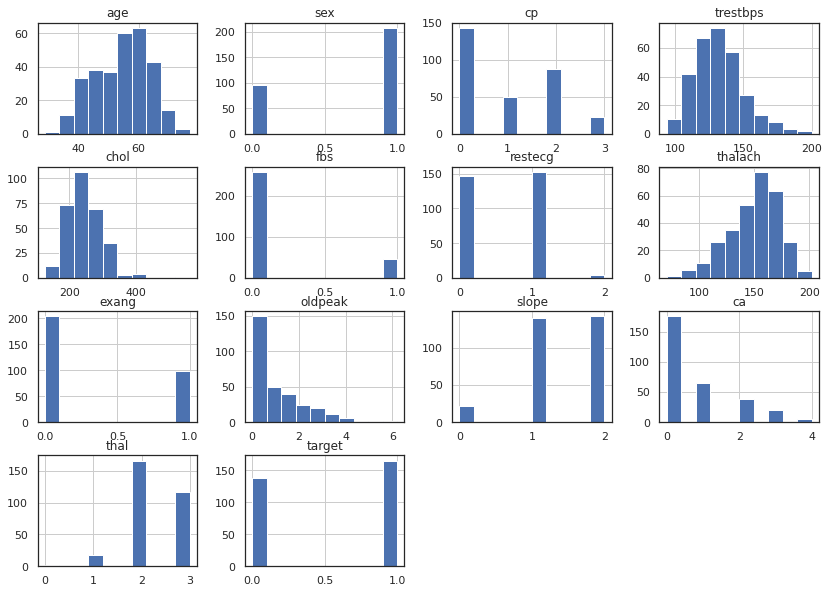

In [147]:
hist = df.hist()

Let's use [Gaussian Mixture Model](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) to cluster our data.

GMM is not a classification model. It does not try to fit the data to given labels. Hence, we do not need to separate our data to Train and Test sets.

However, we also don't want to reveal the true known labels to the model, so we will remove the target column.

In [149]:
##### YOUR TURN #############
# 1) Remove the target colunm from the dataframe, and save it under a 
#    variable named 'labels'
# 2) save the rest of the dataframe under a variable 'X'
# 3) Instantiate an instance of the GMM in a variable named gmm, with 2 clusters
# 4) fit it to the training data.
# 5) Try different covariance types (e.g. full, tied, etc.)














#############################

Let's test how well we did:

In [150]:
from sklearn import metrics

preds = gmm.predict(df.drop('target', axis=1))
print(metrics.classification_report(labels, preds))

              precision    recall  f1-score   support

           0       0.30      0.45      0.36       138
           1       0.23      0.14      0.17       165

    accuracy                           0.28       303
   macro avg       0.27      0.29      0.27       303
weighted avg       0.26      0.28      0.26       303



It seems, that the model had score worse than the KNN on this data. 

As we already know, the classes of our data are highly mixed with each other. which makes it difficult to correctly predict their labels. 

Since we actually have calculated gaussians, let's check the probabilities themselves:

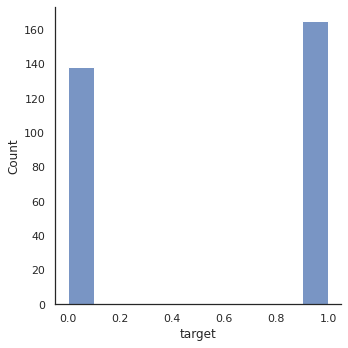

In [151]:
sns.displot(labels)

In Sklearn,  𝑔𝑚𝑚.𝑝𝑟𝑒𝑑𝑖𝑐𝑡(𝑋)  the model assigns every data point to one of the clusters and  𝑔𝑚𝑚.𝑝𝑟𝑒𝑑𝑖𝑐𝑡_𝑝𝑟𝑜𝑏𝑎(𝑋)  function return the probabilities that a data point belongs to each of the K clusters.

Sklearn's GaussianMixture also comes with different options to constrain the covariance of the difference classes estimated: *spherical*, *diagonal*, *tied* or full covariance.

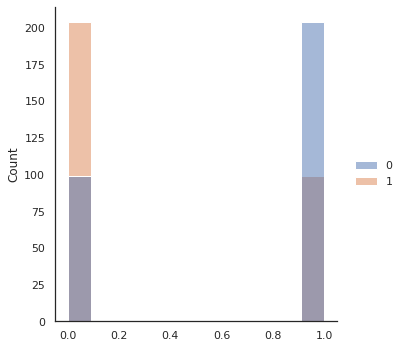

In [152]:
sns.displot(gmm.predict_proba(X))

Let's try to reduce the dimensionality again and plot the data

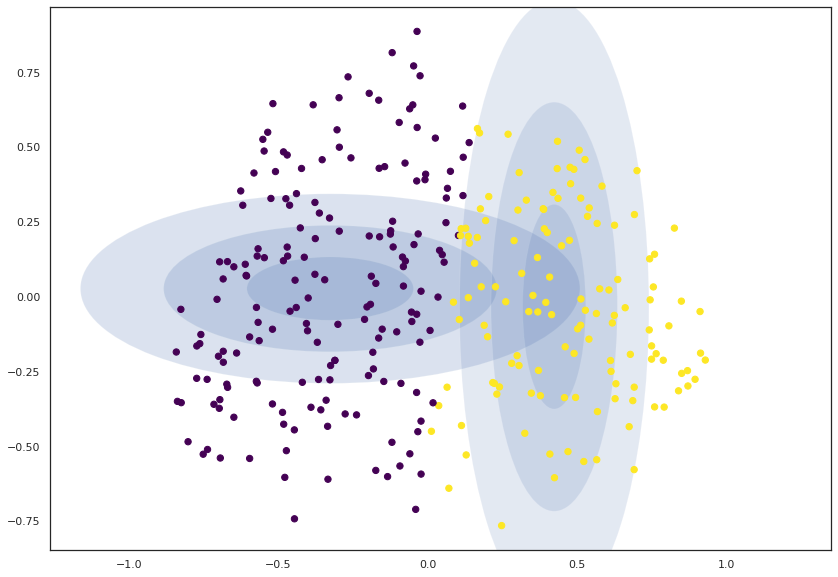

In [153]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, labels=None, ax=None):
    ax = ax or plt.gca()
    if labels is not None:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df.drop('target', axis=1)) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 

# reduce the dimensionality to 2 (so we can draw it...)
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(normalized_df)
labels = gmm.fit(Y_sklearn).predict(Y_sklearn)

plot_gmm(gmm, Y_sklearn, labels)


Let's compare that to the real data:

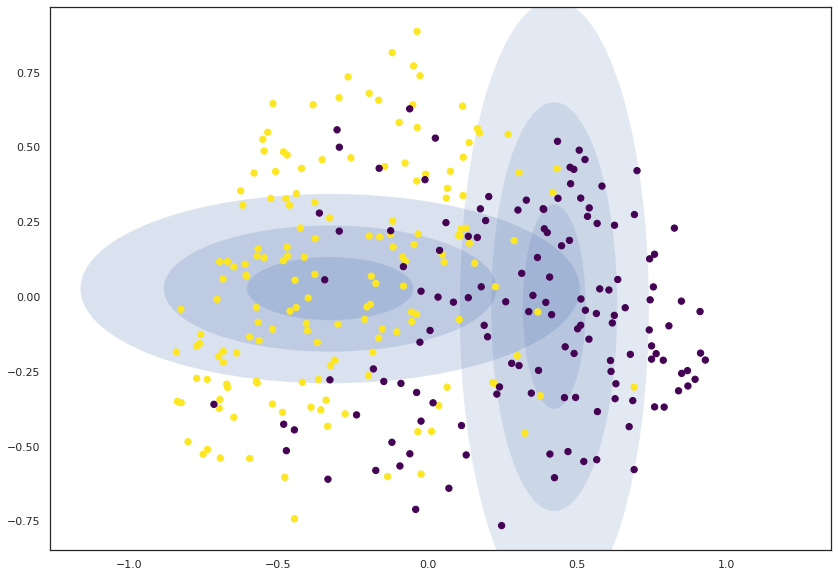

In [154]:
plot_gmm(gmm, Y_sklearn, df['target'])

## Gaussian Mixture Models Clustering Algorithm Explained 
Gaussian mixture models can be used to cluster unlabeled data in much the same way as k-means. There are, however, a couple of advantages to using Gaussian mixture models over k-means.

* k-means does not account for variance (width of the bell shape curve). In two dimensions, variance/ covariance determines the shape of the distribution.


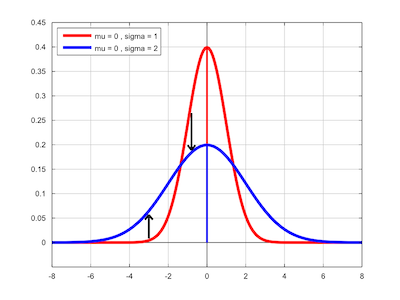

k-means model places a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster, with a radius defined by the most distant point in the cluster.

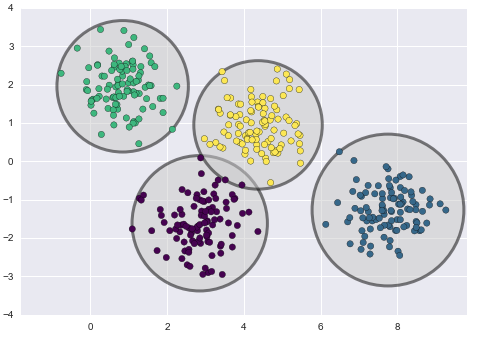

This works fine for when data is circular. However, when data takes on different shape, we end up with something like this:

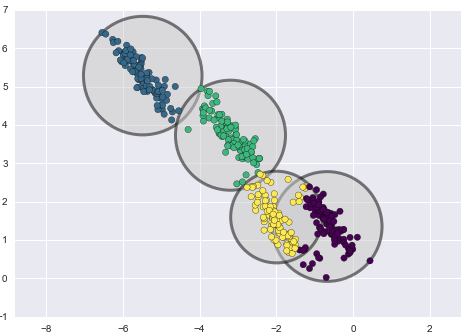



In contrast, Gaussian mixture models can handle even elongated data clusters:
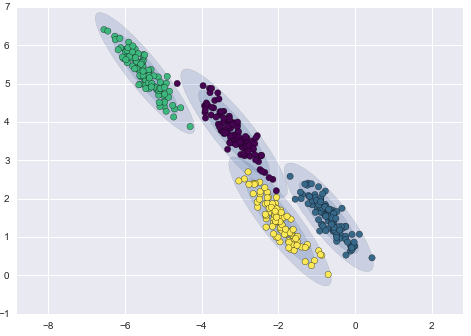


* K-means performs hard classification whereas GMM performs soft classification, i.e. in k-means, data point is deterministically assigned to one and only one cluster, but in reality there may be overlapping between the cluster GMM provide us the probabilities of the data point belonging to each of the possible clusters.

## Gaussian Mixture Models At A Glance
As the name implies, a Gaussian mixture model involves the mixture (i.e. superposition) of multiple Gaussian distributions. Here rather than identifying clusters by “nearest” centroids, we fit a set of k gaussians to the data. And we estimate gaussian distribution parameters such as mean and Variance for each cluster and weight of a cluster. After learning the parameters for each data point we can calculate the probabilities of it belonging to each of the clusters.

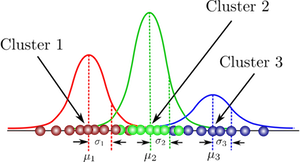

Every distribution is multiplied by a weight  𝜋 ( 𝜋1+𝜋2+𝜋3=1 ) to account for the fact that we do not have an equal number of samples from each category. In other words, we might only have included 1000 people from the red cluster class and 100,000 people from the green cluster class.



## Expectation Maximization
### Expectation

The first step, known as the expectation step or  $𝐸$  step, consists of calculating the expectation of the component assignments  $𝐶_𝑘$  for each data point  $x_i∈𝑋$  given the model parameters  $𝜋_𝑘$,   $𝜇_𝑘$  and  $𝜎_𝑘$.

### Maximization

The second step is known as the maximization step or $𝑀$  step, which consists of maximizing the expectations calculated in the $E$ step with respect to the model parameters. This step consists of updating the values $𝜋_𝑘$, $𝜇_𝑘$,  and $𝜎_𝑘$ .

The entire iterative process repeats until the algorithm converges, giving a *maximum-likelihood* estimate. Intuitively, the algorithm works because knowing the component assignment  $𝐶_𝑘$  for each  $𝑥_𝑖$  makes solving for  $𝜋_𝑘$,   $𝜇_𝑘$  and  $𝜎_𝑘$  easy, while knowing  $𝜋_𝑘$,   $𝜇_𝑘$,   $𝜎_𝑘$  makes inferring  $𝑝(𝐶_𝑘|𝑥_𝑖)$  easy. The expectation step corresponds to the latter case while the maximization step corresponds to the former. Thus, by alternating between which values are assumed fixed, or known, *maximum likelihood* estimates if the non-fixed values can be calculated efficiently.

### Algorithm
1. Initialize the mean  $𝜇_𝑘$ , the covariance matrix $Σ_𝑘$  and the mixing coefficients  $𝜋_𝑘$  by some random values(or other values).
2. Compute the $𝐶_k$  values for all $k$.
3. Estimate all the parameters again using the current $C_k$ values.
4. Compute log-likelihood function.
5. Put some convergence criterion
6. If the log-likelihood value converges to some value (or if all the parameters converge to some values) then stop, else return to Step 2.

This algorithm only guarantees that we land to a local optimal point, but it does not guarantee that these local optima are also the global ones. And so, if the algorithm starts from different initialization points, in general, it lands into different configurations.



# Choosing the number of components

Previously we learned about the **elbow rule**. Here's another method of selecting the number of components.

## Silhouette Coefficient Score

Silhouette Coefficient score checks how compact the clusters are and how well they are separated. The value ranges between -1 to 1. The closer the score is to one, the better the clustering is:

* 1: The clusters are well apart from each other and well distinguished.
* 0: The clusters are indifferent, or the distance between the clusters is not significant.
* -1: The clusters are reversely assigned.

Sklearn has already an implementation to calculate the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). You can [read more about it here](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Since the fitting procedure is not deterministic, we can use statistics:

* We will run twenty fits for each number of clusters
* We will consider the mean value and the standard deviation of the best *five runs*.



In [155]:
from sklearn.metrics import silhouette_score

In [156]:
n_clusters = np.arange(2, 8)
sils = []
sils_err = []
repeatition = 20
X = Y_sklearn # df.drop('target', axis=1)

for n in n_clusters:
    tmp_sil = []
    for _ in range(repeatition):
        gmm=GaussianMixture(n_components=n, n_init=2).fit(X) 
        labels=gmm.predict(X)
        sil=metrics.silhouette_score(X, labels, metric='euclidean')
        tmp_sil.append(sil)
    
    arr = np.array(tmp_sil)
    dx = np.argsort(arr)[:int(repeatition/5)]
    val=np.mean(arr[dx])
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

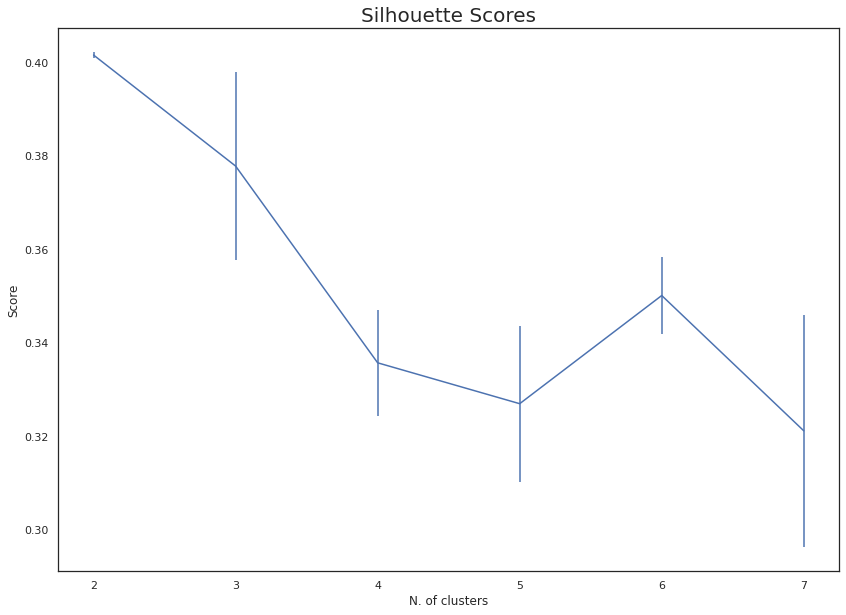

In [157]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.show()

It seems that for this data, 2-3 clusters get the best score.

## Bayesian information criterion (BIC)

This criterion estimates how good the GMM is in predicting the given data. The lower is the BIC, the better the model is. To avoid overfitting, this technique penalizes models with large number of clusters.



In [ ]:
n_clusters=np.arange(2, 8)
bics=[]
bics_err=[]
iterations=20
X = Y_sklearn # df.drop('target', axis=1)

for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X) 
        
        tmp_bic.append(gmm.bic(X))
      
    arr = np.array(tmp_bic)
    dx = np.argsort(arr)[:int(repeatition/5)]
    val=np.mean(arr[dx])
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

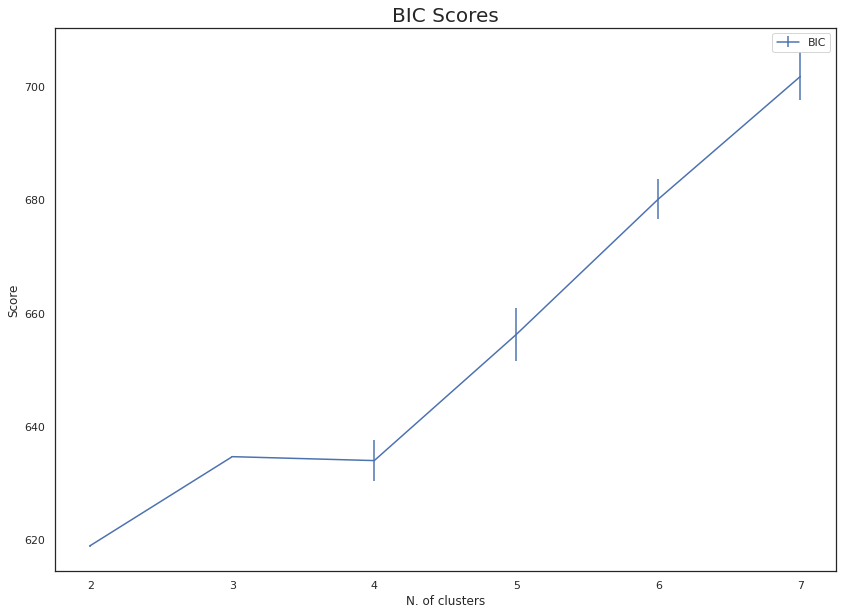

In [ ]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()
plt.show()

Basec on the BIC score, if we were not sure between 2 or 3 clusters, the BIC clearly points towards 2 clusters.

## Akaike information criterion

[Akaike information criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion) is another way to estimate the number of components. It is similar to the BIC method, but is more severe for large amount of clusters.

As with the BIC, sklearn has an [implementation of the AIC score for GMM](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.aic).

In [ ]:
### YOUR TURN ####

# Plot the AIC score of the GMM model.




##################

# Generating new data

GMM is a **generative model**. Since it is a statistical model, in addition to clustering data, it can also generate new points that are drown from the calculated distributions.



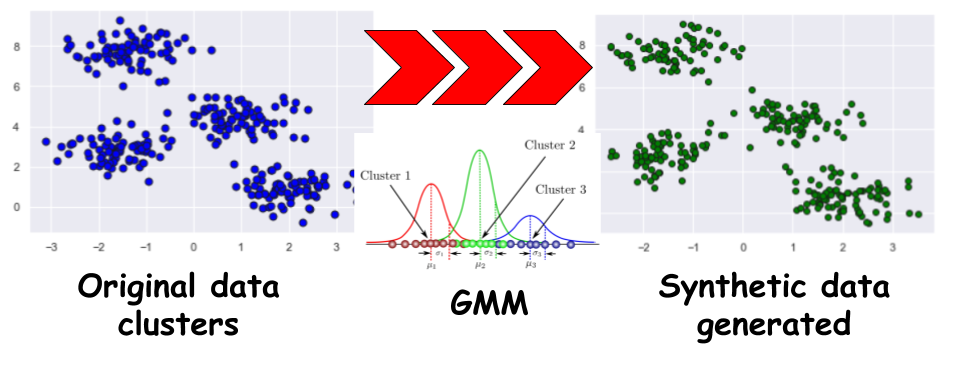

To see how it works, let's use GMM this time on a different type of data - on images.

In [161]:
from sklearn.datasets import load_digits

(1797, 64)


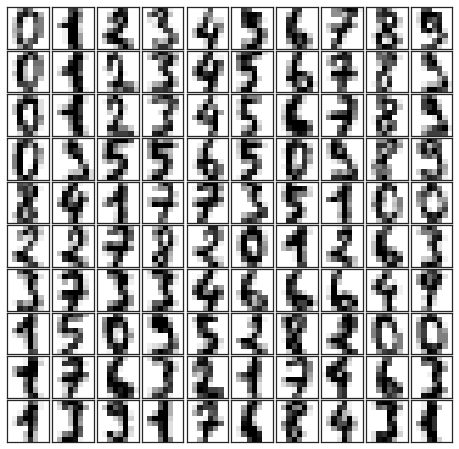

In [171]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)



digits = load_digits()
plot_digits(digits.data)
print(digits.data.shape)

We have here nearly 1,800 digits in 64 dimensions, and we can build a GMM on top of these to generate more. 

GMMs can have difficulty converging in such a high dimensional space, so we will again reduce the dimensionality with PCA, asking it to preserve 99% of the variance in the projected data:

In [172]:
pca = PCA(0.99, whiten=True)
reduced_data = pca.fit_transform(digits.data)
reduced_data.shape

(1797, 41)

The result has 41 dimensions, a reduction of nearly 1/3 with almost no information loss. Given this projected data, let's use the AIC to get a gauge for the number of GMM components we should use:

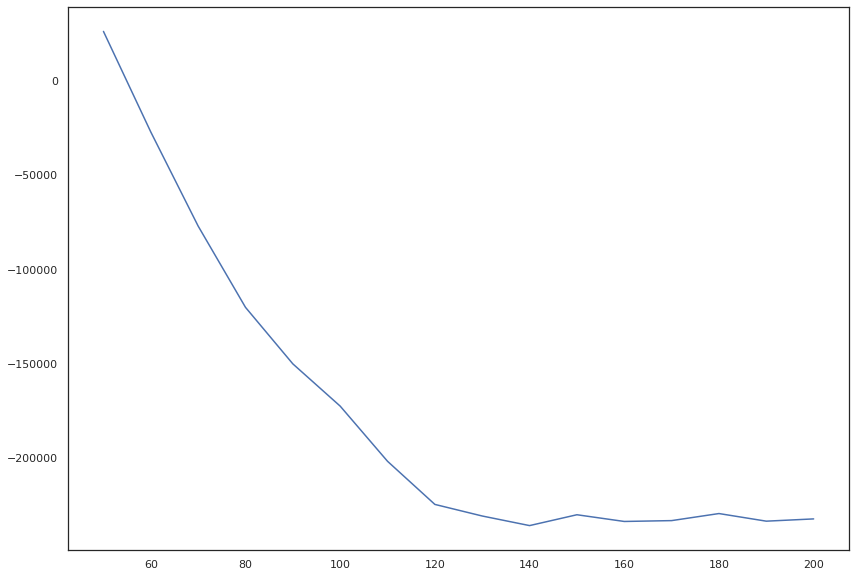

In [173]:
# Note: np.arange is similar to python's range, but with some more capabilities.
# here, we generate a list of numbers from 50 to 210, in steps of 10.
n_components = np.arange(50, 210, 10)

models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]

aics = [model.fit(reduced_data).aic(reduced_data) for model in models]
plt.plot(n_components, aics);

We can use `140` as our number of clusters.

Let's fit our GMM and ensure it converges.

In [174]:
gmm = GaussianMixture(140, covariance_type='full', random_state=0)
gmm.fit(reduced_data)
print(gmm.converged_)


True


Now we can draw samples of 100 new points within this 41-dimensional projected space, using the GMM as a generative model:

In [180]:
data_new = gmm.sample(100)
data_new[0].shape

(100, 41)

Finally, we use the inverse transform of our PCA object to return to the original dimensionality and construct the new digits:

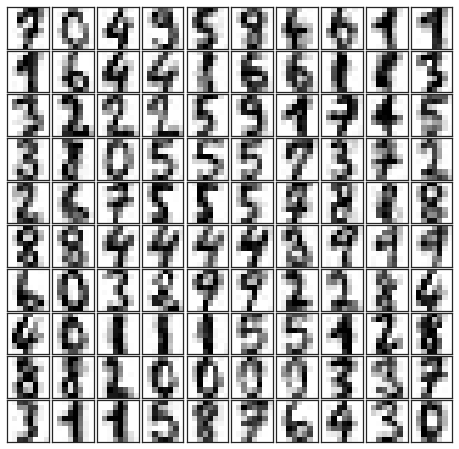

In [181]:
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)

# Binomial distributions

We have learned several techniques to model so far, for classification and clustering.

The Guassian Mixture Model was our first step in involving statistics and distributions into our models. 

However, Gaussian distribution isn't the only type of distriutions. 
To start understanding the statistical properties and the probabilities behind them, we nede to dive deeper into additional types of distributions.

And we start this journey with the *Binomial Distribution*

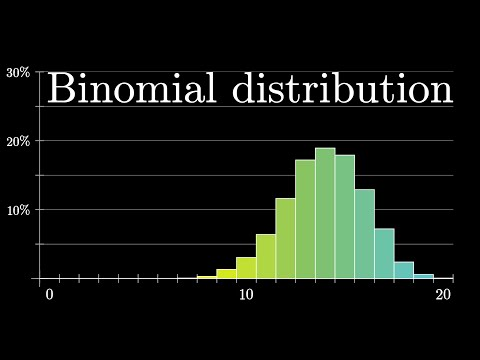

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('8idr1WZ1A7Q')